# Hospital Length of Stay Prediction Regression Model

## Team Name: The Predictive Squad
## Team Members:


1. Kashish Patel - 202418044
2. Vedant Dave - 202418014
3. Sujal Dhrangdhariya - 202418017
4. Jatin Sindhi - 202418055



# Importing Libraries :-

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# For detailed explaination of each feature of dataset plese visit this site
dataset_link = 'https://microsoft.github.io/r-server-hospital-length-of-stay/input_data.html'

# Data Analysis and Model Training Section :-




## Data Analysis and Feature Engineering Section

In [17]:
import pandas as pd
# Loading Length of Stay csv file as a pandas dataframe
los = pd.read_csv('/content/drive/MyDrive/LengthOfStay.csv')
los.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [18]:
los.isna().sum() # there are no null values

,0
eid,0
vdate,0
rcount,0
gender,0
dialysisrenalendstage,0
asthma,0
irondef,0
pneum,0
substancedependence,0
psychologicaldisordermajor,0


In [19]:
# dropping eid, visit_date, discharge date, facid column as they won't be useful for our model
los = los.drop(columns=['eid', 'vdate', 'discharged'])

In [20]:
# dropping facid (facility id) as it won't be useful for our model training
los = los.drop(columns=['facid'])

In [21]:
# Assigning F = 1 and M = 0
los['gender'] = los['gender'].replace({'F': 1, 'M': 0}).astype(int)
los

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
0,0,1,0,0,0,0,0,0,0,0,...,14.20,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,3
1,5+,1,0,0,0,0,0,0,0,0,...,4.10,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,7
2,1,1,0,0,0,0,0,0,0,0,...,8.90,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,3
3,0,1,0,0,0,0,0,0,0,0,...,9.40,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,1
4,0,1,0,0,0,1,0,1,0,0,...,9.05,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,0,0,0,0,0,0,0,0,0,...,9.30,132.614977,171.422555,12.0,0.650323,30.063069,80,6.5,1,6
99996,0,0,0,0,0,0,0,0,0,0,...,9.30,138.327320,122.342450,12.0,1.521424,28.969548,61,6.5,1,1
99997,1,0,0,0,1,0,0,0,0,0,...,7.70,136.695905,108.288106,12.0,1.025677,26.354919,61,6.9,1,4
99998,0,0,0,0,0,0,0,0,1,0,...,8.20,135.980516,111.750731,16.0,1.035400,29.193462,59,5.6,1,4


In [22]:
'''
As in  rconunt(readmission count) column we have values like 5+ (for every readmission 5 or more times)
we will replace them with 5 for smoother operations.
'''
los['rcount'] = los['rcount'].replace('5+', 5).astype(int)
los

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
0,0,1,0,0,0,0,0,0,0,0,...,14.20,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,3
1,5,1,0,0,0,0,0,0,0,0,...,4.10,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,7
2,1,1,0,0,0,0,0,0,0,0,...,8.90,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,3
3,0,1,0,0,0,0,0,0,0,0,...,9.40,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,1
4,0,1,0,0,0,1,0,1,0,0,...,9.05,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,0,0,0,0,0,0,0,0,0,...,9.30,132.614977,171.422555,12.0,0.650323,30.063069,80,6.5,1,6
99996,0,0,0,0,0,0,0,0,0,0,...,9.30,138.327320,122.342450,12.0,1.521424,28.969548,61,6.5,1,1
99997,1,0,0,0,1,0,0,0,0,0,...,7.70,136.695905,108.288106,12.0,1.025677,26.354919,61,6.9,1,4
99998,0,0,0,0,0,0,0,0,1,0,...,8.20,135.980516,111.750731,16.0,1.035400,29.193462,59,5.6,1,4


In [23]:
los.info(); los.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rcount                      100000 non-null  int64  
 1   gender                      100000 non-null  int64  
 2   dialysisrenalendstage       100000 non-null  int64  
 3   asthma                      100000 non-null  int64  
 4   irondef                     100000 non-null  int64  
 5   pneum                       100000 non-null  int64  
 6   substancedependence         100000 non-null  int64  
 7   psychologicaldisordermajor  100000 non-null  int64  
 8   depress                     100000 non-null  int64  
 9   psychother                  100000 non-null  int64  
 10  fibrosisandother            100000 non-null  int64  
 11  malnutrition                100000 non-null  int64  
 12  hemo                        100000 non-null  int64  
 13  hematocrit     

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,1.118210,0.576430,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,1.542958,0.494126,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [24]:
los['lengthofstay'].describe()

,lengthofstay
count,100000.00000
mean,4.00103
std,2.36031
min,1.00000
25%,2.00000
50%,4.00000
75%,6.00000
max,17.00000


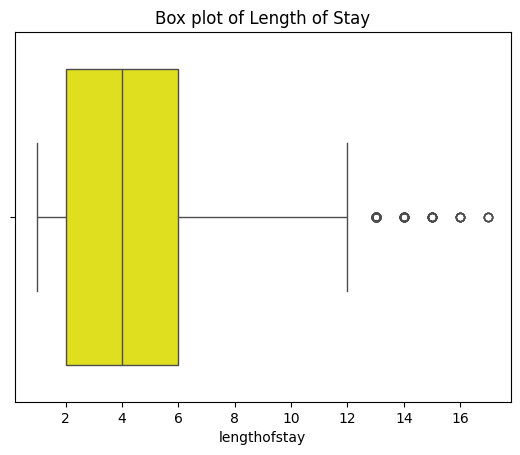

In [25]:
sns.boxplot(data=los, x='lengthofstay', color='yellow')
plt.title('Box plot of Length of Stay')
plt.show()

In [26]:
# Correlation matrix of our features with our target variable (Length of stay)
features = ['rcount','gender','dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
    'substancedependence', 'psychologicaldisordermajor', 'depress',
    'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium',
    'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'lengthofstay']

correlation = los[features].corr()
correlation.style.background_gradient(cmap='viridis')

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
rcount,1.000000,0.007477,-0.002509,0.004394,-0.007634,-0.002675,0.000922,-0.004554,0.001357,-0.002657,-0.001936,-0.004032,0.000557,-0.000117,0.001644,-0.002058,-0.003549,-0.006301,-0.003103,0.000951,0.004760,-0.001696,0.004233,0.749514
gender,0.007477,1.000000,-0.074040,0.061761,-0.102153,-0.056246,-0.048870,-0.147810,0.017844,-0.090223,-0.013809,-0.102387,0.025778,-0.243216,0.112747,0.001676,0.005316,-0.121508,-0.004357,0.001546,-0.003599,-0.053056,-0.000375,-0.069575
dialysisrenalendstage,-0.002509,-0.074040,1.000000,-0.005340,0.157381,0.120472,0.049925,0.085162,0.013229,0.311179,0.018211,0.209172,0.177411,-0.120281,-0.053125,-0.000198,-0.003199,0.272239,-0.000372,0.003331,0.003802,-0.043435,0.003251,0.169695
asthma,0.004394,0.061761,-0.005340,1.000000,0.020001,0.058444,-0.005668,0.026300,0.026402,-0.008556,0.015787,0.008620,0.015954,-0.032994,0.016505,-0.004474,0.000641,-0.005675,-0.001479,-0.000597,0.006473,0.001910,-0.001108,0.082005
irondef,-0.007634,-0.102153,0.157381,0.020001,1.000000,0.151320,0.082848,0.127544,0.019041,0.176662,0.021999,0.300174,0.125682,-0.054934,-0.078817,-0.001443,-0.000598,0.149846,-0.010980,-0.005841,0.002803,-0.047849,0.006194,0.193838
pneum,-0.002675,-0.056246,0.120472,0.058444,0.151320,1.000000,0.076131,0.089732,0.016293,0.090839,0.025374,0.133551,0.088315,-0.076968,-0.005961,-0.003280,-0.000981,0.064899,-0.001437,0.000650,0.005045,-0.055898,0.000590,0.135461
substancedependence,0.000922,-0.048870,0.049925,-0.005668,0.082848,0.076131,1.000000,0.081762,0.004690,0.087252,0.007624,0.048180,0.084697,-0.106387,-0.062084,0.001232,0.001923,0.073065,0.002481,-0.001434,0.002433,-0.058826,-0.000814,0.147886
psychologicaldisordermajor,-0.004554,-0.147810,0.085162,0.026300,0.127544,0.089732,0.081762,1.000000,0.295137,0.096239,0.015112,0.119817,0.066088,0.046264,-0.119881,-0.001268,-0.003387,0.073234,-0.000066,-0.000749,0.000377,0.065988,0.005916,0.286724
depress,0.001357,0.017844,0.013229,0.026402,0.019041,0.016293,0.004690,0.295137,1.000000,-0.001908,0.011945,0.019038,0.027931,0.026997,-0.053935,-0.005884,0.003777,0.007889,-0.002212,0.001648,0.007289,0.040031,0.001255,0.121408
psychother,-0.002657,-0.090223,0.311179,-0.008556,0.176662,0.090839,0.087252,0.096239,-0.001908,1.000000,0.002234,0.310403,0.197482,-0.147034,-0.083957,0.000311,-0.000414,0.347354,-0.005638,0.002643,0.001140,-0.028148,0.006368,0.191695


 The patients with higher readmission counts tend to stay longer in the hospital

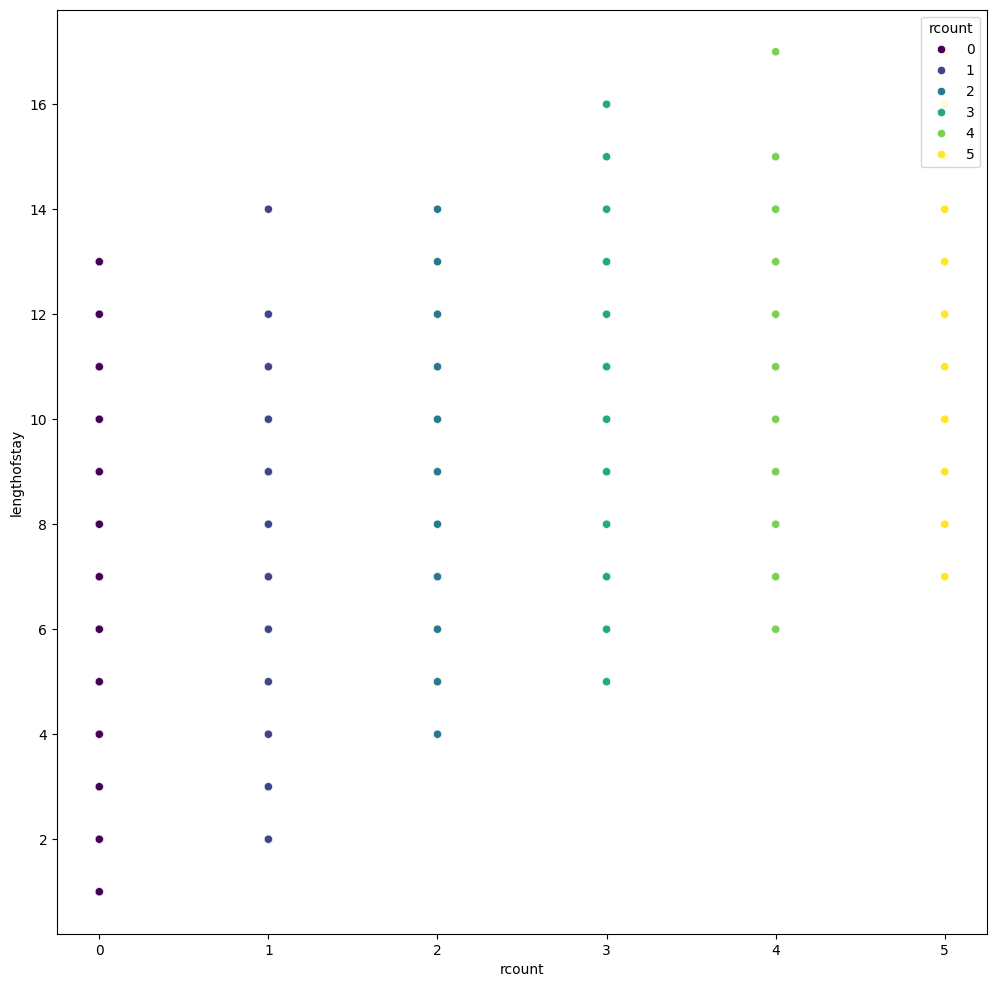

In [27]:
plt.figure(figsize=(12,12))
a = sns.scatterplot(data=los, x='rcount', y='lengthofstay', hue='rcount', palette='viridis')
sns.move_legend(a, 'upper right')
plt.show(a)

<ipython-input-28-0e2e85e5359a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='condition', y='avg. lengthofstay',palette='viridis')


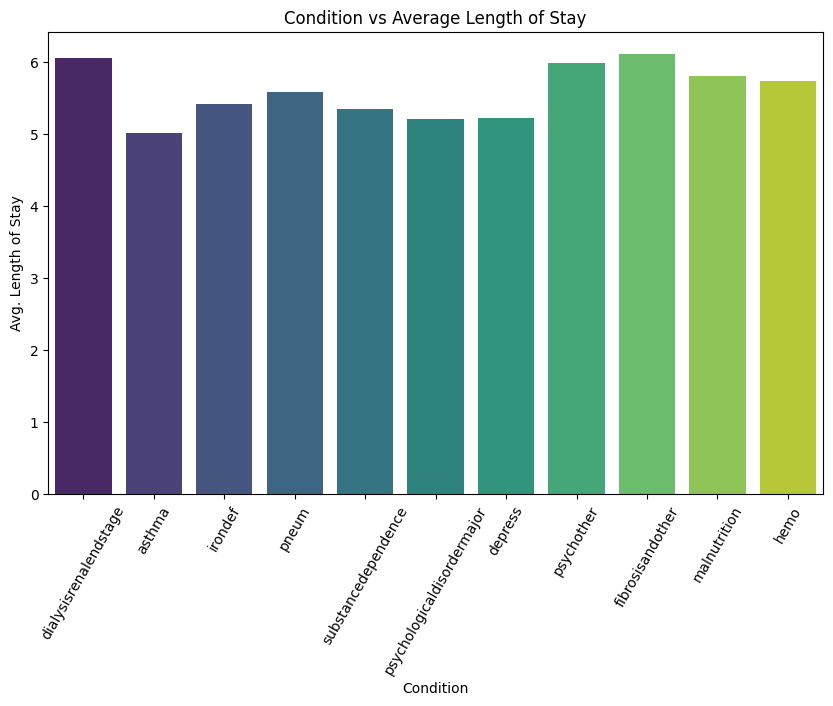

In [28]:
condition_cols = [
    'dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
    'substancedependence', 'psychologicaldisordermajor', 'depress',
    'psychother', 'fibrosisandother', 'malnutrition', 'hemo'
]
avg_los = []

for condition in condition_cols:
    positive_cases = los[los[condition] == 1]
    avg_stay = positive_cases['lengthofstay'].mean()
    avg_los.append(avg_stay)

plot_data = pd.DataFrame({
    'condition': condition_cols,
    'avg. lengthofstay': avg_los
})

plt.figure(figsize=(10,6))
sns.barplot(data=plot_data, x='condition', y='avg. lengthofstay',palette='viridis')
plt.xlabel('Condition')
plt.ylabel('Avg. Length of Stay')
plt.xticks(rotation=60)
plt.title('Condition vs Average Length of Stay')
plt.show()


 From the graph above we can infer that <font color='red'> 'Dialysis Renal End Stage' </font> and <font color='red'> 'Fibrosis' </font> are medical conditions which are responsible for most amount of length of stay. So, the patients with this type of conditions will be needing more resources at hospital.

Text(0.5, 1.0, 'sodium vs Length of Stay')

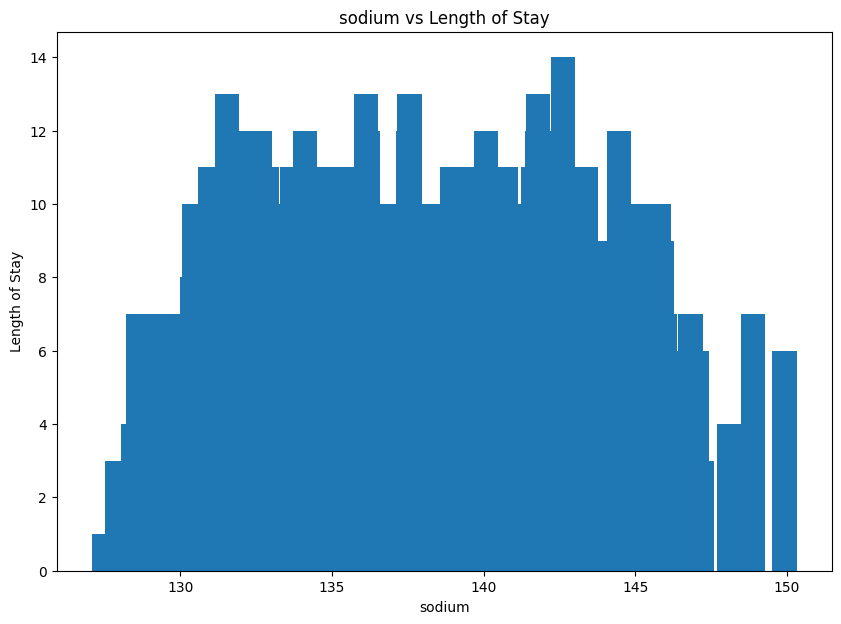

In [29]:
# bar plot on sodium vs length of stay
plt.figure(figsize=(10,7))
plt.bar(los['sodium'][:5001] ,los['lengthofstay'][:5001])
plt.xlabel('sodium')
plt.ylabel('Length of Stay')
plt.title('sodium vs Length of Stay')

Text(0.5, 1.0, 'neutrophils vs Length of Stay')

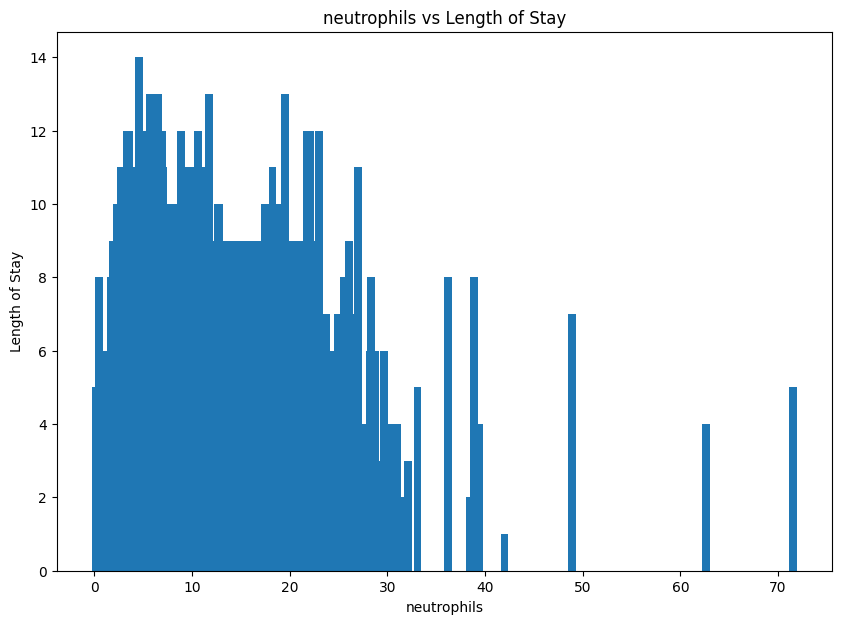

In [30]:
# barplot on neutrophils vs length of stay
plt.figure(figsize=(10,7))
plt.bar(los['neutrophils'][:5001] ,los['lengthofstay'][:5001])
plt.xlabel('neutrophils')
plt.ylabel('Length of Stay')
plt.title('neutrophils vs Length of Stay')

Text(0.5, 1.0, 'hematocrit vs Length of Stay')

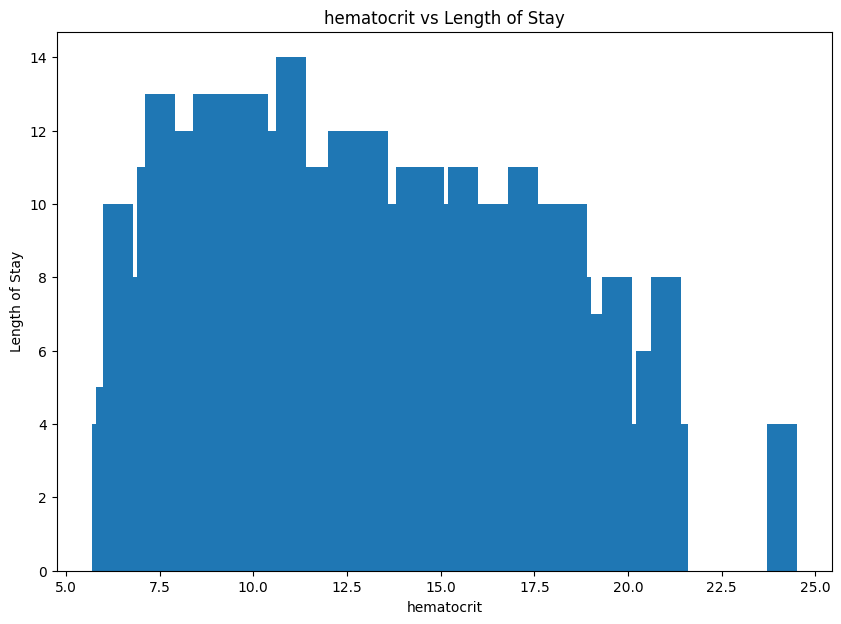

In [31]:
# bar plot on hematocrit vs length of stay
plt.figure(figsize=(10,7))
plt.bar(los['hematocrit'][:5001] ,los['lengthofstay'][:5001])
plt.xlabel('hematocrit')
plt.ylabel('Length of Stay')
plt.title('hematocrit vs Length of Stay')

Text(0.5, 1.0, 'glucose vs Length of Stay')

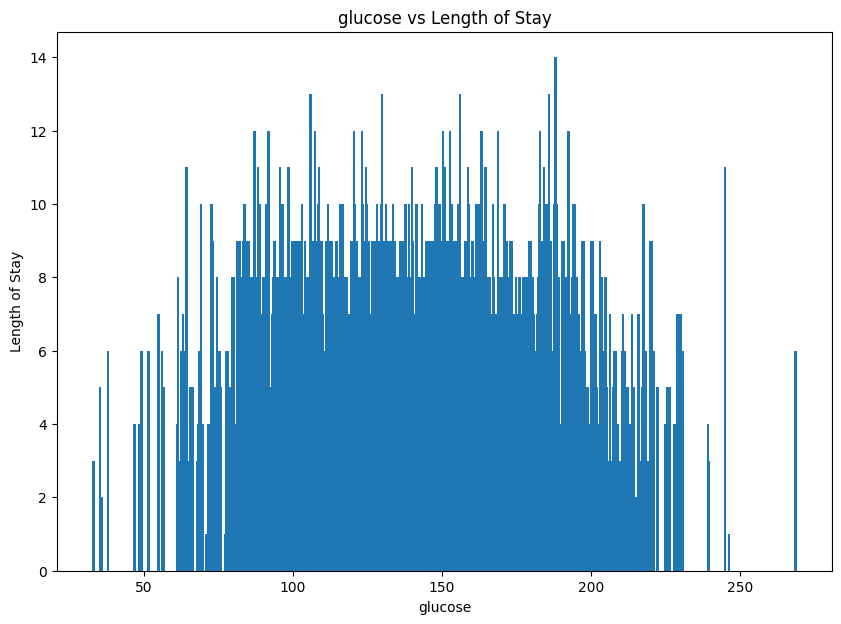

In [32]:
# bar plot on glucose vs length of stay
plt.figure(figsize=(10,7))
plt.bar(los['glucose'][:5001] ,los['lengthofstay'][:5001])
plt.xlabel('glucose')
plt.ylabel('Length of Stay')
plt.title('glucose vs Length of Stay')

Text(0.5, 1.0, 'bloodureanitro vs Length of Stay')

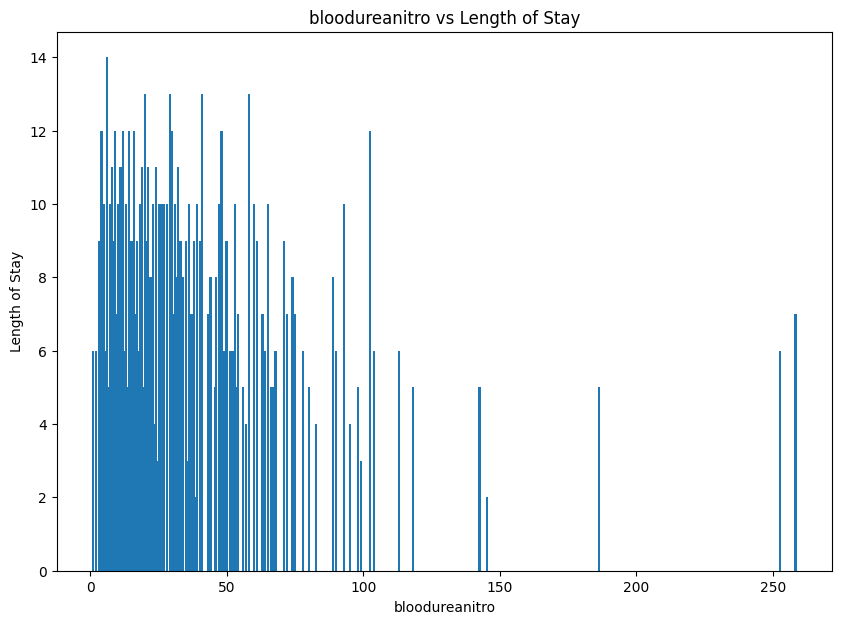

In [33]:
# bar plot on bloodureanitro vs lengthofstay
plt.figure(figsize=(10,7))
plt.bar(los['bloodureanitro'][:5001] ,los['lengthofstay'][:5001])
plt.xlabel('bloodureanitro')
plt.ylabel('Length of Stay')
plt.title('bloodureanitro vs Length of Stay')

Text(0.5, 1.0, 'creatinine vs Length of Stay')

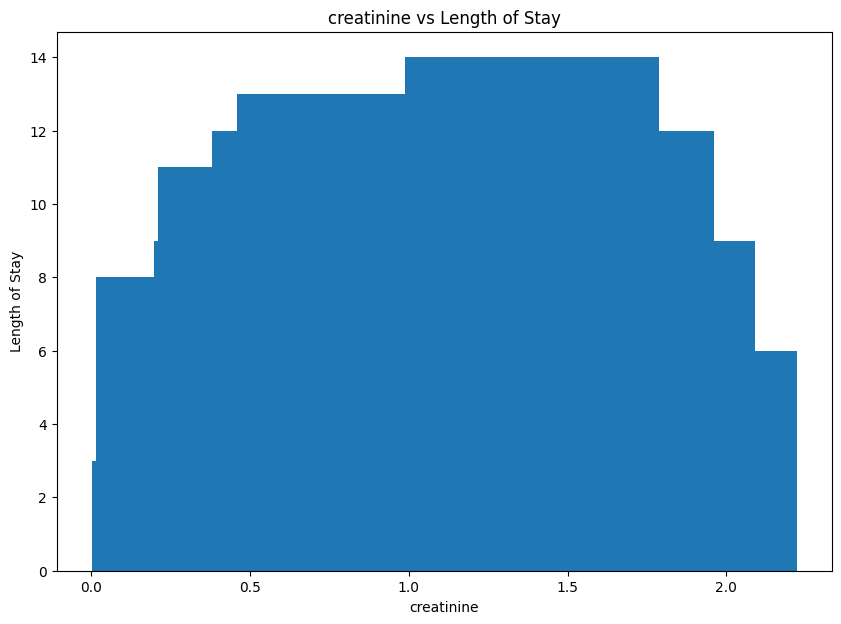

In [34]:
# bar plot of creatinine vs length of stay
plt.figure(figsize=(10,7))
plt.bar(los['creatinine'][:5001] ,los['lengthofstay'][:5001])
plt.xlabel('creatinine')
plt.ylabel('Length of Stay')
plt.title('creatinine vs Length of Stay')

Text(0.5, 1.0, 'bmi vs Length of Stay')

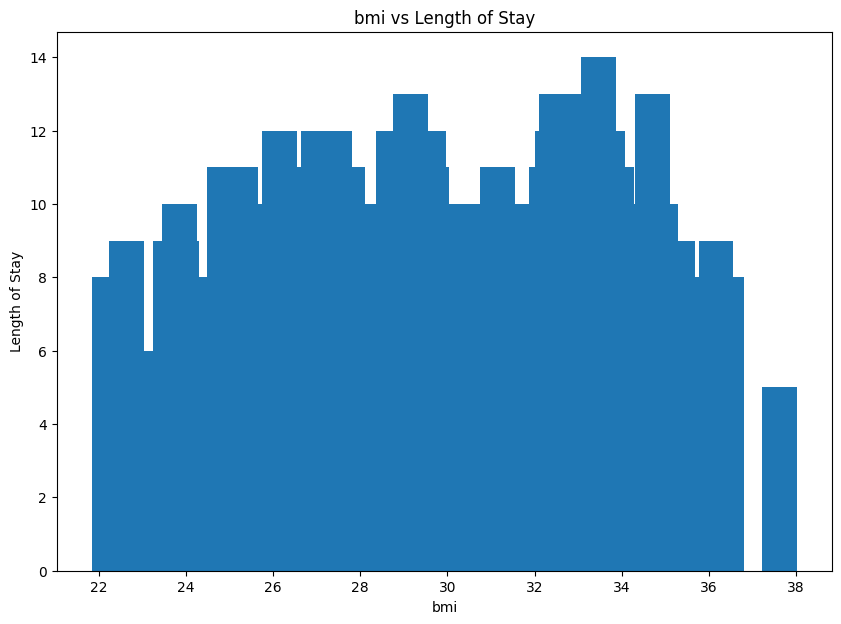

In [35]:
# bar plot of bmi vs length of stay
plt.figure(figsize=(10,7))
plt.bar(los['bmi'][:5001] ,los['lengthofstay'][:5001])
plt.xlabel('bmi')
plt.ylabel('Length of Stay')
plt.title('bmi vs Length of Stay')

Text(0.5, 1.0, 'pulse vs Length of Stay')

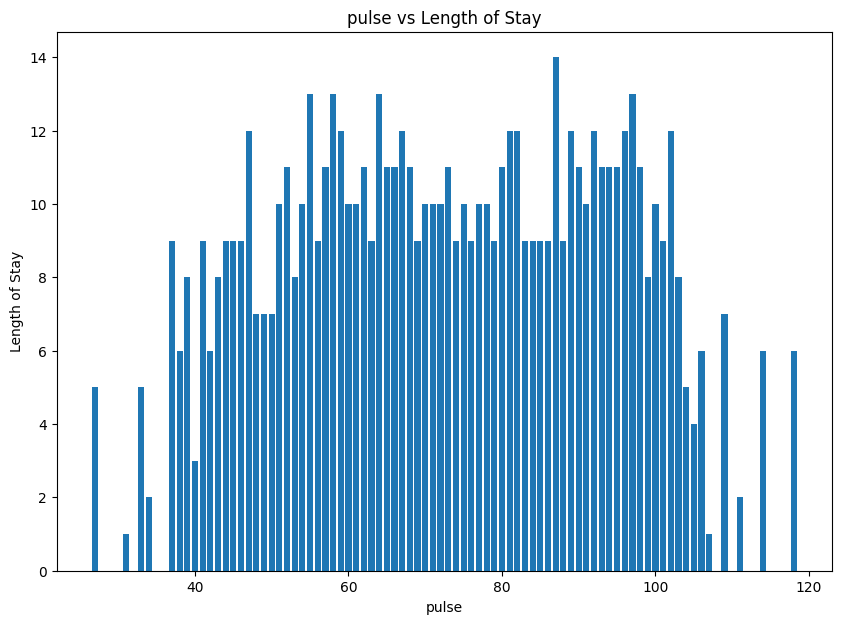

In [36]:
# bar plot on pulse rate vs length of stay
plt.figure(figsize=(10,7))
plt.bar(los['pulse'][:5001] ,los['lengthofstay'][:5001])
plt.xlabel('pulse')
plt.ylabel('Length of Stay')
plt.title('pulse vs Length of Stay')

Text(0.5, 1.0, 'respiration vs Length of Stay')

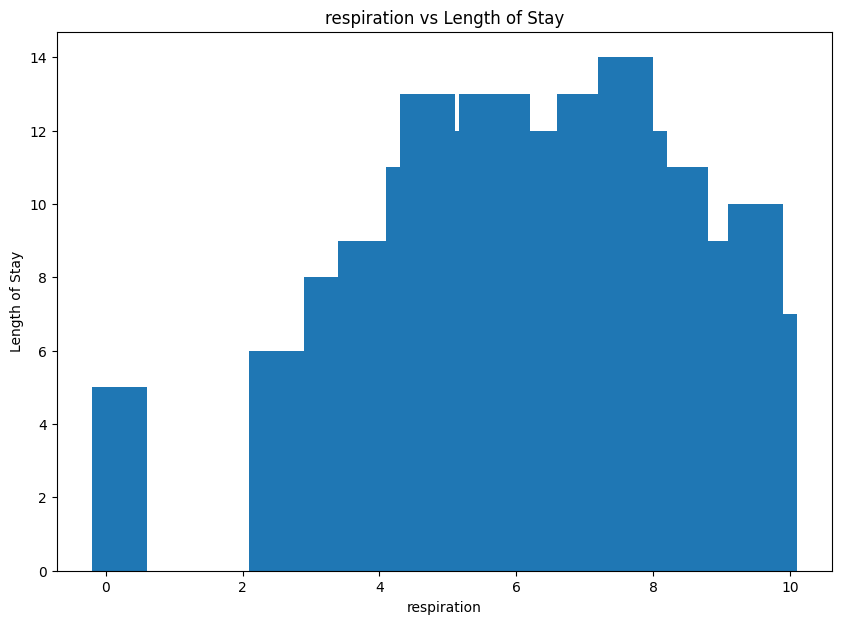

In [37]:
# bar plot of respiration vs length of stay
plt.figure(figsize=(10,7))
plt.bar(los['respiration'][:5001] ,los['lengthofstay'][:5001])
plt.xlabel('respiration')
plt.ylabel('Length of Stay')
plt.title('respiration vs Length of Stay')

Text(0.5, 1.0, 'secondarydiagnosisnonicd9 vs Length of Stay')

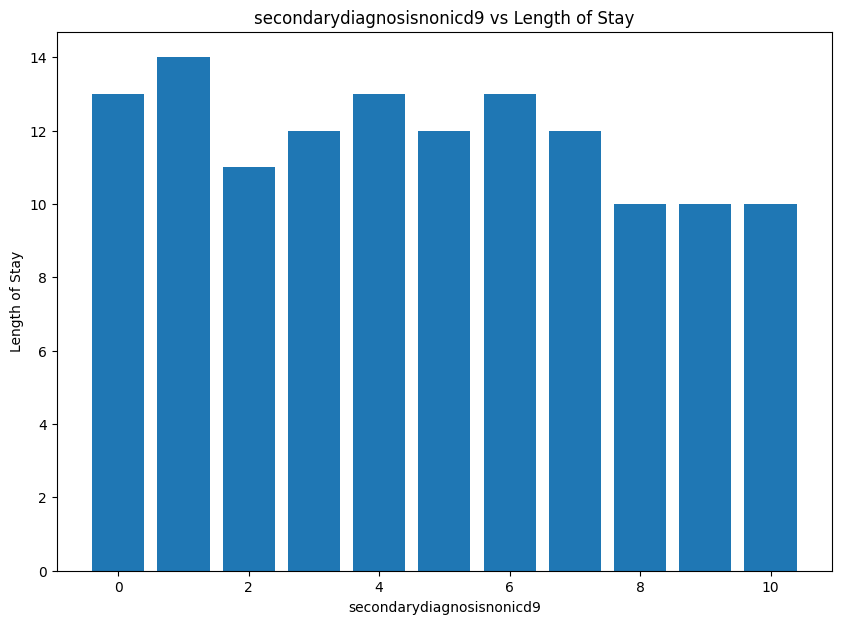

In [38]:
# bar plot of secondarydiagosisicd9 vs length of stay
plt.figure(figsize=(10,7))
plt.bar(los['secondarydiagnosisnonicd9'][:5001] ,los['lengthofstay'][:5001])
plt.xlabel('secondarydiagnosisnonicd9')
plt.ylabel('Length of Stay')
plt.title('secondarydiagnosisnonicd9 vs Length of Stay')

## Training Testing Splitting

In [39]:
# Spilliting our data into 80:10:10
X = los.iloc[:, :-1]
y = los.iloc[:, -1]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# combining train and validation sets together for further model training
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

## Linear Regression Model

In [40]:
# Fitting our data points in a linear regression model
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)



In [41]:
# Evaluation metrics before hyperparameter finetuning
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
print('\nEvaluation metrics before combining dataset\n')
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Evaluation metrics before combining dataset

Mean Absolute Error (MAE): 0.89
Mean Squared Error (MSE): 1.33
Root Mean Squared Error (RMSE): 1.16
R-squared (R²): 0.76


In [42]:
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [43]:
param = {'copy_X': [True,False], 'fit_intercept': [True,False], 'positive': [True,False]}

In [44]:
gs = GridSearchCV(lr_model, param, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [45]:
gs_df = pd.DataFrame(gs.cv_results_)
gs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_X,param_fit_intercept,param_positive,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061888,0.012798,0.005998,0.002230,True,True,True,"{'copy_X': True, 'fit_intercept': True, 'posit...",0.747075,0.746301,0.746911,0.748947,0.750248,0.747896,0.001472,3
1,0.119700,0.019151,0.006151,0.001395,True,True,False,"{'copy_X': True, 'fit_intercept': True, 'posit...",0.747435,0.746207,0.747208,0.748992,0.750313,0.748031,0.001449,1
2,0.055200,0.012392,0.004848,0.000183,True,False,True,"{'copy_X': True, 'fit_intercept': False, 'posi...",0.746933,0.746181,0.746485,0.748733,0.749943,0.747655,0.001446,7
3,0.110141,0.021699,0.005636,0.001462,True,False,False,"{'copy_X': True, 'fit_intercept': False, 'posi...",0.747247,0.746202,0.746723,0.748828,0.749929,0.747786,0.001386,5
4,0.041688,0.010662,0.007450,0.003897,False,True,True,"{'copy_X': False, 'fit_intercept': True, 'posi...",0.747075,0.746301,0.746911,0.748947,0.750248,0.747896,0.001472,3
5,0.127413,0.048576,0.009667,0.003702,False,True,False,"{'copy_X': False, 'fit_intercept': True, 'posi...",0.747435,0.746207,0.747208,0.748992,0.750313,0.748031,0.001449,1
6,0.084426,0.014844,0.009450,0.002962,False,False,True,"{'copy_X': False, 'fit_intercept': False, 'pos...",0.746933,0.746181,0.746485,0.748733,0.749943,0.747655,0.001446,7
7,0.294190,0.037284,0.019527,0.010345,False,False,False,"{'copy_X': False, 'fit_intercept': False, 'pos...",0.747247,0.746202,0.746723,0.748828,0.749929,0.747786,0.001386,5


In [46]:
gs_df[['param_copy_X','param_fit_intercept','param_positive','mean_test_score']]

,param_copy_X,param_fit_intercept,param_positive,mean_test_score
0,True,True,True,0.747896
1,True,True,False,0.748031
2,True,False,True,0.747655
3,True,False,False,0.747786
4,False,True,True,0.747896
5,False,True,False,0.748031
6,False,False,True,0.747655
7,False,False,False,0.747786


In [47]:
gs.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [48]:
# Training after hyperparameter finetuning and with train + validation set combined
lr = LinearRegression(copy_X=True, fit_intercept=True, positive=False)
lr_model = lr.fit(X_combined, y_combined)
y_pred = lr.predict(X_test)

In [49]:
# Evaluation metrics for linear regression model after hyperparameter finetuning and for combined data set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('\nEvaluation metrics on combined (train+val) dataset')
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Evaluation metrics on combined (train+val) dataset
Mean Absolute Error (MAE): 0.89
Mean Squared Error (MSE): 1.38
Root Mean Squared Error (RMSE): 1.18
R-squared (R²): 0.75


In [50]:
# accuracy for linear regression
x1 = abs(y_pred-y_test)
y1 = 100*(x1/y_test)
lr_accuracy=100-np.mean(y1)
print(f'Accuracy: {round(lr_accuracy,2)}%')

Accuracy: 66.45%


## Random Forest Regressor Model

In [51]:
# fitting our data points in a random forest regressor
rfr = RandomForestRegressor(n_estimators=100)
rfr_model = rfr.fit(X_train, y_train)


y_pred2 = rfr.predict(X_val)


r2 = r2_score(y_val, y_pred2)
mae = mean_absolute_error(y_val, y_pred2)
mse = mean_squared_error(y_val, y_pred2)
rmse = np.sqrt(mse)

print(f'R-squared (R²): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


R-squared (R²): 0.93
Mean Absolute Error (MAE): 0.37
Mean Squared Error (MSE): 0.38
Root Mean Squared Error (RMSE): 0.61


In [52]:
rfr_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
# Retraining random forest regressor with train + val dataset
rfr = RandomForestRegressor(n_estimators=100)
rfr_model = rfr.fit(X_combined, y_combined)


y_pred2 = rfr.predict(X_test)

# Evaluation metrics after combining dataset (train + val)
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print(f'R-squared (R²): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


R-squared (R²): 0.92
Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.42
Root Mean Squared Error (RMSE): 0.64


In [54]:
pred_actual_df = pd.DataFrame({'Actual LOS': y_test, 'Predicted LOS': y_pred2})
pred_actual_df

,Actual LOS,Predicted LOS
86525,1,1.03
4024,2,2.00
4731,8,8.21
46016,4,4.26
46674,6,6.06
...,...,...
61984,6,6.70
43471,7,7.56
92524,6,6.19
86579,1,1.00


In [55]:
# accuracy of random forest regressor
x1 = abs(y_pred2-y_test)
y1 = 100*(x1/y_test)
accuracy_rfr=100-np.mean(y1)
print(f'Accuracy: {round(accuracy_rfr,2)}%')

Accuracy: 89.57%


## Decision Tree Regressor

In [56]:
# Decision Tree Regressor model training before hyperparameter finetuning
dtr = DecisionTreeRegressor()


dtr.fit(X_train, y_train)


y_pred = dtr.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f'R-squared (R²): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

R-squared (R²): 0.85
Mean Absolute Error (MAE): 0.48
Mean Squared Error (MSE): 0.83
Root Mean Squared Error (RMSE): 0.91


In [57]:

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")


best_dt_regressor = grid_search.best_estimator_


y_test_pred = best_dt_regressor.predict(X_test)


mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R^2: {r2_test:.4f}")


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test MSE: 0.7247, MAE: 0.4908, R^2: 0.8677


In [58]:
# Model training after choosing best hyperparameters and combining train + val dataset
dtr = DecisionTreeRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=10)


dtr.fit(X_combined, y_combined)


y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'R-squared (R²): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

R-squared (R²): 0.87
Mean Absolute Error (MAE): 0.48
Mean Squared Error (MSE): 0.72
Root Mean Squared Error (RMSE): 0.85


In [59]:
pred_actual_df = pd.DataFrame({'Actual LOS': y_test, 'Predicted LOS': y_pred})
pred_actual_df

,Actual LOS,Predicted LOS
86525,1,1.000
4024,2,2.000
4731,8,6.750
46016,4,4.250
46674,6,5.800
...,...,...
61984,6,6.875
43471,7,8.400
92524,6,6.000
86579,1,1.000


In [60]:
# Accuracy of Decision Tree Regressor
x1 = abs(y_pred-y_test)
y1 = 100*(x1/y_test)
accuracy_dtr=100-np.mean(y1)
print(f'Accuracy: {round(accuracy_dtr,2)}%')

Accuracy: 87.6%


## Gradient Boosting Regressor Model

In [61]:
# Fitting our data points in gradient boosting regressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.8, max_depth=3)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.37
Mean Squared Error (MSE): 0.25
Root Mean Squared Error (RMSE): 0.50
R-squared (R²): 0.95


In [62]:
# Training model again by combining train + validation dataset
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.8, max_depth=3)
gbr.fit(X_combined, y_combined)
y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Evaluation metrics after combining dataset
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.27
Root Mean Squared Error (RMSE): 0.52
R-squared (R²): 0.95


In [63]:
# Gradient Boosting regressor accuracy
x1 = abs(y_pred-y_test)
y1 = 100*(x1/y_test)
accuracy_gbr=100-np.mean(y1)
print(f'Accuracy: {round(accuracy_gbr,2)}%')

Accuracy: 86.5%


In [64]:
pred_actual_df = pd.DataFrame({'Actual LOS': y_test, 'Predicted LOS': y_pred})
pred_actual_df

,Actual LOS,Predicted LOS
86525,1,1.466943
4024,2,1.905968
4731,8,7.932513
46016,4,5.288803
46674,6,5.760028
...,...,...
61984,6,6.688296
43471,7,8.381139
92524,6,5.598338
86579,1,1.349906


## Best Model Choosing

<ipython-input-65-961033b1c179>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting'], y=[lr_accuracy, accuracy_rfr, accuracy_dtr, accuracy_dtr], palette='viridis')


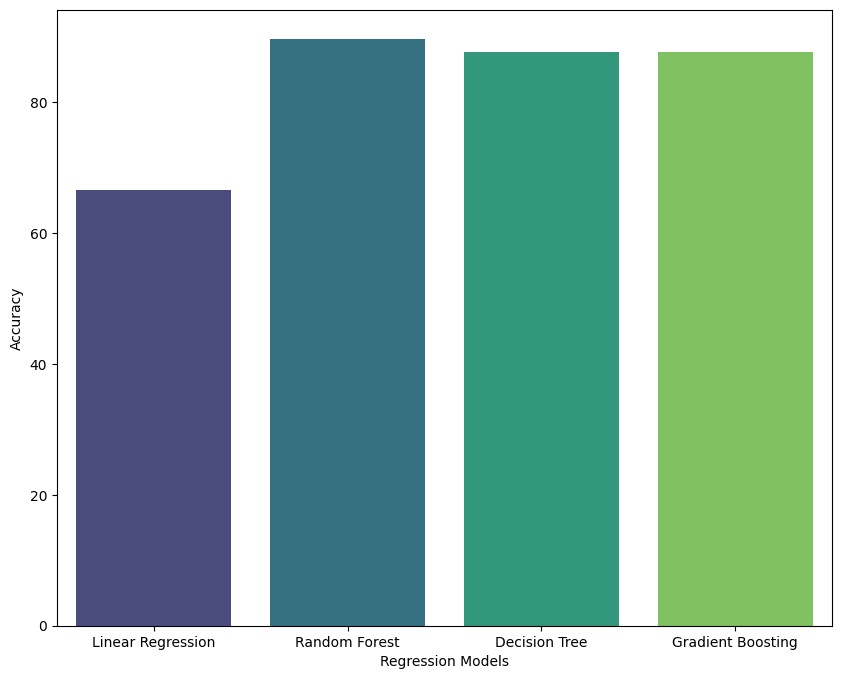

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(x=['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting'], y=[lr_accuracy, accuracy_rfr, accuracy_dtr, accuracy_dtr], palette='viridis')
plt.xlabel('Regression Models')
plt.ylabel('Accuracy')
plt.show()

Model Rankings as per accuracy are as follows:


1.   Random Forest Regressor
2.   Decision Tree Regressor
3.   Gradient Boosting Regressor
4.   Linear Regression



# Documentation:-

## 1. Data Preparation & Processing :-
### Loading Data :
**->** Read health data from CSV files scrapped from DataSet Link given below. A complete description of dataset is given in the link below

DataSet Link :
https://microsoft.github.io/r-server-hospital-length-of-stay/input_data.html

## 2. Feature Engineering :-
**->** Drop Columns eid, vdate, discharged, facid

**->** Assigning Value for gender column (F = 1 & M = 0)

**->** As in rcount column we have values like 5+ so we replaced them with 5.

## 3. Visualization :-
1. Box plot for length of stay :-
2. Correlation Matrix of our feature with our target variable
3. readmission count vs length of stay (Scatter Plot)
4. Medical condition vs. average length of stay (bar plot)
5. All medical report values vs. length of stay (bar plot)

## 4. Training / Testing / Splitting :-
1. Splitting Our data in 80:10:10 (Train Data : Validation Data : Test Data)
2. Merging train and validation set together for further model training

## 5. Model Training :-
1. Linear Regression Model:

  **Psuedocode**:
  1. Fit the model on train set.
  2. Model will predict the value using test set.
  3. Find errors using difference of predicted set and test set.
  

2. Random Forest Regressor

  **Psuedocode**:

  1. Initialize model's hyperparameters (eg. n_estimators=100)
  2. Fit the model on training set.
  3. Predict the output of model using test set.
  4. Find error values using different metrics.

3. Decision Tree Regressor

  **Psuedocode**:
  
  1. Instantiate the model class.
  2. Fit the model on training set.
  3. Predict the outcome of model using test set.
  4. Find error values using different metrics.


4. Gradient Boosting Regressor

  **Psuedocode**:
  1. Instantiate the model class and initialize the hyperparameters (eg. n_estimators=100, learning_rate=0.8, max_depth=3).
  2. Fit the model on training set.
  3. Predict the outcome of model using test set.
  4. Find error values using different metrics.

## 6. Model Pipeline:-

Data Loading -> Data Preprocessing -> Split Data -> Model Selection -> Model Training -> Model Evaluation -> Model Prediction

## 7. Contributions/Novelty:-

This predictor model will not only help hospital personnel but also the insurance providers who can get an estimate of how long a patient will be living in the hospital based on his/her medical conditions this will help them settle the claim amount accordingly and there will be less chances of fradulent cases as previously patients used to show higher no. of days just to claim a higher amount from the insurance providers.

Hospitals will be benefitted by this model in a way that they can easily manage and allocate resources for each patient if they get a rough estimate of patient's stay.

## 8. Citations:-


*   For Dataset: https://microsoft.github.io/r-server-hospital-length-of-stay/

*   For Regression Model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

* For Random Forest Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

* For Decision Tree Regressor: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

* For Gradient Boosting Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html



